# K Nearest Neighbors (KNN)

### 1. Regresión KNN

Error cuadrático medio (MSE): 1172607704.96
Coeficiente de determinación (R² Score): 0.8471


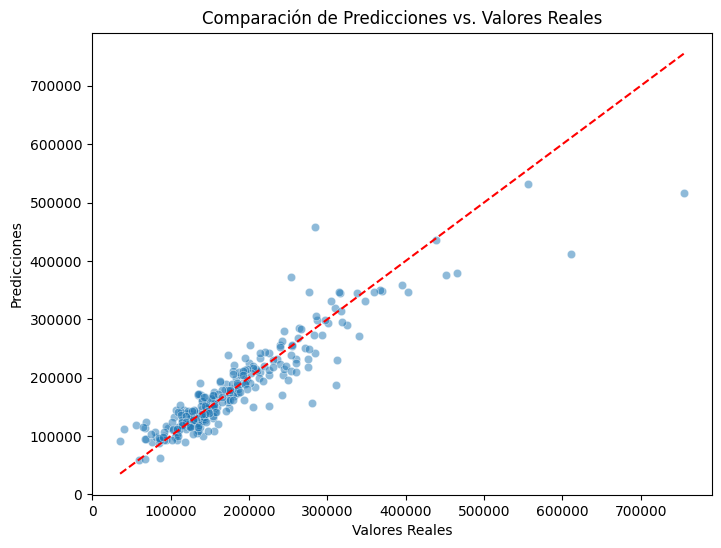

In [1]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Cargar el dataset
df = pd.read_csv("../data/train_preprocessed.csv")

# Seleccionar características relevantes y la variable objetivo
features = ['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
target = 'SalePrice'

X = df[features]
y = df[target]

# Dividir el dataset en entrenamiento y prueba (80% - 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Crear y entrenar el modelo KNN para regresión
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# Hacer predicciones
y_pred = knn.predict(X_test_scaled)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Error cuadrático medio (MSE): {mse:.2f}')
print(f'Coeficiente de determinación (R² Score): {r2:.4f}')

# Visualizar las predicciones vs valores reales
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Comparación de Predicciones vs. Valores Reales')
plt.show()


### 2. Análisis de los resultados del modelo KNN para regresión

Error Cuadrático Medio (MSE): 1172607704.96
Coeficiente de Determinación (R² Score): 0.8471

El modelo tiene un buen desempeño con un R² Score alto, indicando que explica la mayoría de la variabilidad en los precios de las casas.
El MSE es alto, lo que indica que hay un margen de error significativo en las predicciones. Podría ser necesario ajustar hiperparámetros o probar con otro modelo.


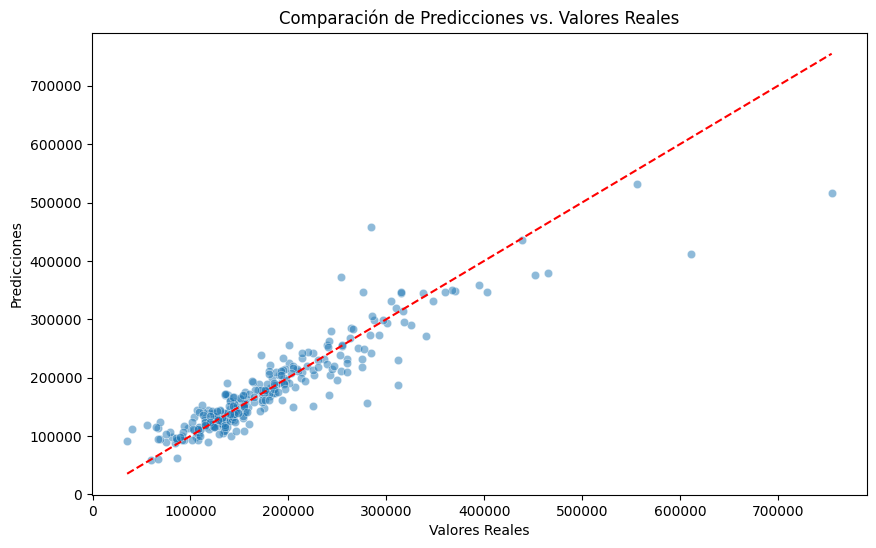

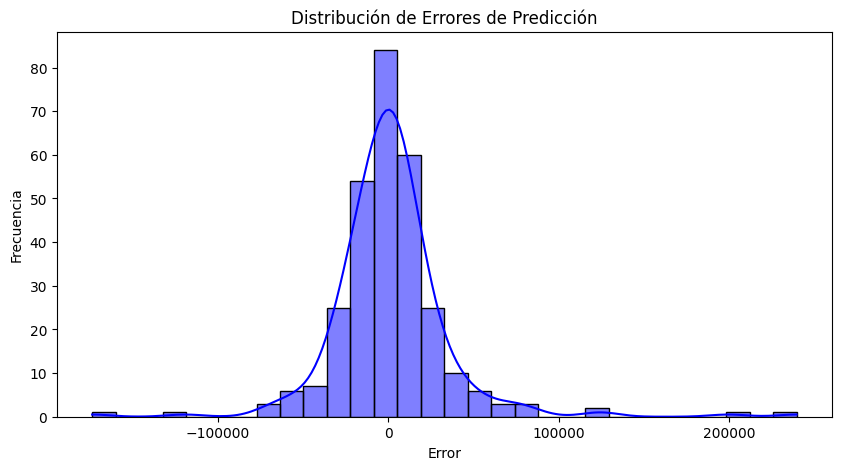

In [2]:
# Evaluar el modelo KNN para regresión

# Calcular métricas de evaluación
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Imprimir los resultados
print(f'Error Cuadrático Medio (MSE): {mse:.2f}')
print(f'Coeficiente de Determinación (R² Score): {r2:.4f}')

# Análisis de los resultados
if r2 > 0.8:
    print("\nEl modelo tiene un buen desempeño con un R² Score alto, indicando que explica la mayoría de la variabilidad en los precios de las casas.")
else:
    print("\nEl modelo podría mejorarse, ya que el R² Score indica que no está explicando bien la variabilidad en los datos.")

if mse > 1e9:
    print("El MSE es alto, lo que indica que hay un margen de error significativo en las predicciones. Podría ser necesario ajustar hiperparámetros o probar con otro modelo.")

# Visualizar los resultados
plt.figure(figsize=(10,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Comparación de Predicciones vs. Valores Reales')

# Mostrar el análisis de dispersión de errores
error = y_test - y_pred
plt.figure(figsize=(10,5))
sns.histplot(error, bins=30, kde=True, color='blue')
plt.title('Distribución de Errores de Predicción')
plt.xlabel('Error')
plt.ylabel('Frecuencia')
plt.show()
